In [1]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

In [2]:
import numpy as np
from numpy import linalg as la
from scipy import special as sps
import matplotlib.pyplot as plt
import random
import time

### Task 17

In [3]:
def legendre(n, x):
    """
    Determines legendre polynom with degree n at list of positions x
    """

    A = np.zeros((n,n))
    for i in range(len(A)-1):
        yi = 1 / np.sqrt(4 - (i + 1)**(-2))
        A[i][i+1] = yi
        A[i+1][i] = yi

    ln_x = [ np.linalg.det( x_ * np.identity(n) - A) for x_ in x]
    ln_1 = np.linalg.det( 1 * np.identity(n) - A)

    ## roots
    roots, v = la.eigh(A)

    ## weights
    a = [roots**k for k in range(n)] # c^k matrix
    b = [(1+(-1)**(k))/(k+1) for k in range(n)] # integral monomials

    #print(a)
    #print(b)

    weights = la.solve(a,b)

    return ln_x/ln_1, roots, weights

In [4]:
N = range(1,7)
x = np.linspace(-1,1,100)

legendre polynom of degree n

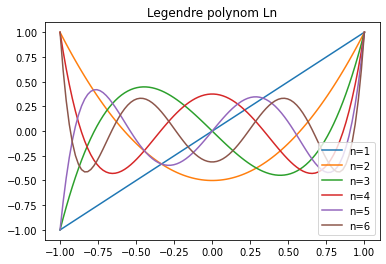

In [5]:
for n in N:
    ln, tmp, tmp2 = legendre(n,x)
    plt.plot(x, ln, label="n={0}".format(n))
plt.title("Legendre polynom Ln")
plt.legend()
plt.show()

Ground truth: legendre polynom with scipy

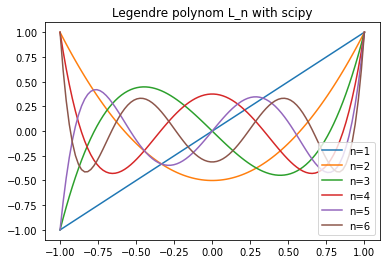

In [6]:
for n in N:
    ln = [sps.eval_legendre(n,x_) for x_ in x]
    plt.plot(x, ln, label="n={0}".format(n))
plt.title("Legendre polynom L_n with scipy")
plt.legend()
plt.show()

roots = eigenvalues of A_n & weights = linear equation with integral of monomials

In [7]:
roots_eigenvalues = []
weights_linequ = []
for n in N:
    tmp, roots, weights = legendre(n,x)
    roots_eigenvalues.append(roots)
    weights_linequ.append(weights)

ground truth: roots of legendre polynom scipy

In [8]:
roots_gt = []
weights_gt = []
for n in N:
    roots, weights = sps.roots_legendre(n)
    roots_gt.append(roots)
    weights_gt.append(weights)

In [9]:
print("Roots eigenvalues of A_n = ", roots_eigenvalues[:4])
print("Roots with scipy legendre polynom = ", roots_gt[:4])
print("")
print("Weights with linear equation = ", weights_linequ[:4])
print("Weights with scipy legendre polynom = ", weights_gt[:4])

Roots eigenvalues of A_n =  [array([0.]), array([-0.57735027,  0.57735027]), array([-0.77459667,  0.        ,  0.77459667]), array([-0.86113631, -0.33998104,  0.33998104,  0.86113631])]
Roots with scipy legendre polynom =  [array([0.]), array([-0.57735027,  0.57735027]), array([-0.77459667,  0.        ,  0.77459667]), array([-0.86113631, -0.33998104,  0.33998104,  0.86113631])]

Weights with linear equation =  [array([2.]), array([1., 1.]), array([0.55555556, 0.88888889, 0.55555556]), array([0.34785485, 0.65214515, 0.65214515, 0.34785485])]
Weights with scipy legendre polynom =  [array([2.]), array([1., 1.]), array([0.55555556, 0.88888889, 0.55555556]), array([0.34785485, 0.65214515, 0.65214515, 0.34785485])]


In [10]:
def f1(x): return np.exp(x)
def f2(x): return np.sqrt(x)
integral1 = np.e-1
integral2 = 2/3

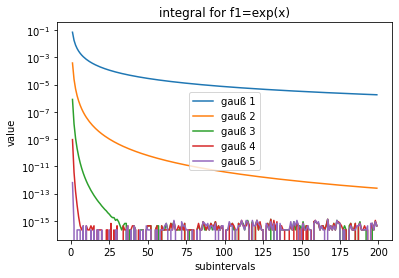

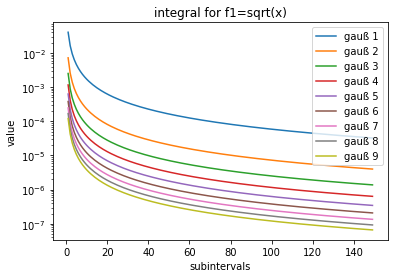

In [11]:
def num_int(f, a, b, m, c, w):

    # step size
    h = (b - a) / m
    # go through each subinterval
    sum1 = 0
    for j in range(0,m):
        sum2 = 0
        x_j = a+j*h
        # calc rule for subinterval
        for c_, w_ in zip(c, w):
            sum2 += w_*f(x_j+c_*h)
        sum1 += h*sum2
    return sum1

def transform(ref, weights):
    rt = [0.5*(1+c) for c in ref]
    wt = [0.5*w for w in weights]
    return rt, wt

# exp(x)
M = 200
for n in range(1,6):
    ln, roots, weights = legendre(n, np.linspace(-1,1,200))
    c, w = transform(roots, weights)
    plt.plot(range(1,M), [np.abs(integral1 - num_int(f1, 0, 1, m, c, w)) for m in range(1,M)], label="gauß {0}".format(n))

plt.title("integral for f1=exp(x)")
plt.xlabel("subintervals")
plt.ylabel("value")
plt.legend()
plt.yscale("log")
plt.show()

# sqrt(x)
M = 150
for n in range(1,10):
    ln, roots, weights = legendre(n, np.linspace(-1,1,200))
    c, w = transform(roots, weights)
    plt.plot(range(1,M), [np.abs(integral2 - num_int(f2, 0, 1, m, c, w)) for m in range(1,M)], label="gauß {0}".format(n))
plt.title("integral for f1=sqrt(x)")
plt.xlabel("subintervals")
plt.ylabel("value")
plt.legend()
plt.yscale("log")
plt.show()

### Task 20
Time measures for inner vector products, vector matrix products, and matrix matrix products

In [12]:
def vec_x_vec(n):
    v1 = np.asarray([random.random() for _ in range(n)])
    v2 = np.asarray([random.random() for _ in range(n)])
    start = time.time()
    res = np.dot(v1, v2)
    end = time.time()

    return end - start

def mat_x_vec(n):
    v1 = np.asarray([[random.random() for _ in range(n)] for i in range(n)])
    v2 = np.asarray([random.random() for _ in range(n)])
    start = time.time()
    res = np.dot(v1, v2)
    end = time.time()

    return end - start

def mat_x_mat(n):
    v1 = np.asarray([[random.random() for _ in range(n)] for i in range(n)])
    v2 = np.asarray([[random.random() for _ in range(n)] for i in range(n)])
    start = time.time()
    res = v1 @ v2
    end = time.time()

    return end - start

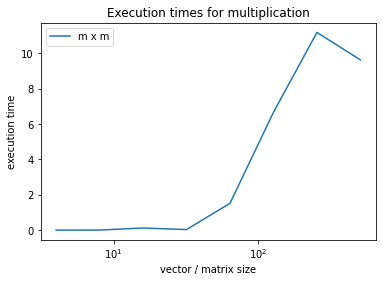

In [13]:
n = [2**i for i in range(2, 10)]

vec_vec_times = np.zeros(len(n))
mat_vec_times = np.zeros(len(n))
mat_mat_times = np.zeros(len(n))

for i in range(0, len(n)):
    #vec_vec_times[i] = vec_x_vec(n[i]) / n[i]**1
    #mat_vec_times[i] = mat_x_vec(n[i]) / n[i]**2
    mat_mat_times[i] =  n[i]**3 / mat_x_mat(n[i]) * 10**(-9)

#plt.plot(n, vec_vec_times, label="v x v")
#plt.plot(n, mat_vec_times, label="m x v")
plt.plot(n, mat_mat_times, label="m x m")

plt.title("Execution times for multiplication")
plt.xlabel("vector / matrix size")
plt.ylabel("execution time")
plt.xscale("symlog")
plt.legend()
plt.show()